## Available models

https://nest-simulator.readthedocs.io/en/stable/models/index.html

## One neuron example

This script simulates a neuron driven by a constant external current and records its membrane potential.

### Step 1

First, we import all necessary modules for simulation, analysis and plotting.

In [1]:
import nest
import nest.voltage_trace
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@c4a0daab5
 Built: Aug 13 2021 01:17:10

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Additionally, we set the verbosity to suppress info messages and reset the kernel. Resetting the kernel allows you to execute the script several times in a Python shell without interferences from previous NEST simulations. Thus, without resetting the kernel the network status including connections between nodes, status of neurons, devices and intrinsic time clocks, is kept and influences the next simulations.

In [2]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

### Step 2

Second, the nodes (neurons and devices) are created using `Create`. We store the returned handles in variables for later reference. The `Create` function also allow you to create multiple nodes e.g. `nest.Create('iaf_psc_alpha',5)`. Also default parameters of the model can be configured using `Create` by including a list of parameter dictionaries e.g. `nest.Create(“iaf_psc_alpha”, params=[{‘I_e’:376.0}])`. In this example we will configure these parameters in an additional step, which is explained in the third section.

In [3]:
neuron = nest.Create("iaf_psc_alpha")
voltmeter = nest.Create("voltmeter")

### Step 3

Third, we set the external current of the neuron.

In [4]:
neuron.I_e = 376.0

### Step 4

Fourth, the neuron is connected to the voltmeter. The command `Connect` has different variants. Plain `Connect` just takes the handles of pre- and postsynaptic nodes and uses the default values for weight and delay. Note that the connection direction for the voltmeter is reversed compared to the spike recorder, because it observes the neuron instead of receiving events from it. Thus, `Connect` reflects the direction of signal flow in the simulation kernel rather than the physical process of inserting an electrode into the neuron. The latter semantics is presently not available in NEST.

In [5]:
nest.Connect(voltmeter, neuron)

### Simulation 

Now we simulate the network using Simulate, which takes the desired simulation time in milliseconds.

In [6]:
nest.Simulate(1000.0)

### Plot

Finally, we plot the neuron’s membrane potential as a function of time and display the plot using pyplot.

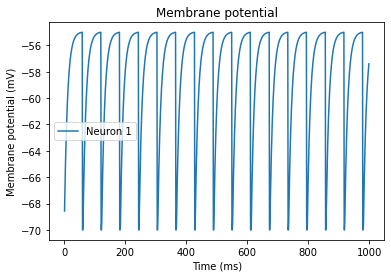

In [7]:
nest.voltage_trace.from_device(voltmeter)
plt.show()

## Example using Hodgkin-Huxley neuron

This example produces a rate-response (FI) curve of the Hodgkin-Huxley neuron hh_psc_alpha in response to a range of different current (DC) stimulations. The result is plotted using matplotlib.

Since a DC input affects only the neuron’s channel dynamics, this routine does not yet check correctness of synaptic response.

Simulating with current I=0 pA
Simulating with current I=20 pA
Simulating with current I=40 pA
Simulating with current I=60 pA
Simulating with current I=80 pA
Simulating with current I=100 pA
Simulating with current I=120 pA
Simulating with current I=140 pA
Simulating with current I=160 pA
Simulating with current I=180 pA
Simulating with current I=200 pA
Simulating with current I=220 pA
Simulating with current I=240 pA
Simulating with current I=260 pA
Simulating with current I=280 pA
Simulating with current I=300 pA
Simulating with current I=320 pA
Simulating with current I=340 pA
Simulating with current I=360 pA
Simulating with current I=380 pA
Simulating with current I=400 pA
Simulating with current I=420 pA
Simulating with current I=440 pA
Simulating with current I=460 pA
Simulating with current I=480 pA
Simulating with current I=500 pA
Simulating with current I=520 pA
Simulating with current I=540 pA
Simulating with current I=560 pA
Simulating with current I=580 pA
Simulating with 

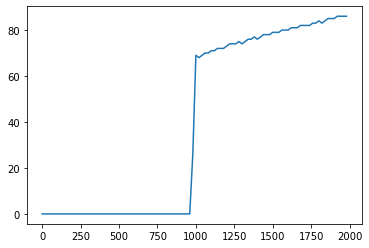

In [8]:
import nest
import numpy as np
import matplotlib.pyplot as plt

nest.set_verbosity('M_WARNING')
nest.ResetKernel()

simtime = 1000

# Amplitude range, in pA
dcfrom = 0
dcstep = 20
dcto = 2000

h = 0.1  # simulation step size in mS

neuron = nest.Create('hh_psc_alpha')
sr = nest.Create('spike_recorder')

sr.record_to = 'memory'

nest.Connect(neuron, sr, syn_spec={'weight': 1.0, 'delay': h})

# Simulation loop
n_data = int(dcto / float(dcstep))
amplitudes = np.zeros(n_data)
event_freqs = np.zeros(n_data)
for i, amp in enumerate(range(dcfrom, dcto, dcstep)):
    neuron.I_e = float(amp)
    print(f"Simulating with current I={amp} pA")
    nest.Simulate(1000)  # one second warm-up time for equilibrium state
    sr.n_events = 0  # then reset spike counts
    nest.Simulate(simtime)  # another simulation call to record firing rate

    n_events = sr.n_events
    amplitudes[i] = amp
    event_freqs[i] = n_events / (simtime / 1000.)

plt.plot(amplitudes, event_freqs)
plt.show()

## Brunel 

In [12]:
import nest
import nest.raster_plot
import nest.voltage_trace
import matplotlib.pyplot as plt

nest.ResetKernel()

dt = 0.005    # the resolution in ms
simtime = 1000.0  # Simulation time in ms

tauSyn = 1.0  # synaptic time constant in ms
tauMem = 20.0  # time constant of membrane potential in ms
CMem = 250.0  # capacitance of membrane in in pF
theta = 1.0  # membrane threshold potential in mV
neuron_params = {"C_m":        CMem,
                 "tau_m":      tauMem,
                 "tau_syn_ex": tauSyn,
                 "tau_syn_in": tauSyn,
                 "t_ref":      2.0,
                 "E_L":        0.0,
                 "V_reset":    -1.0,
                 "V_m":        0.0,
                 "V_th":       theta}

nest.SetKernelStatus({"resolution": dt, "print_time": True, "overwrite_files": True, "data_path": "."})

print("Building network")
nest.SetDefaults("iaf_psc_alpha", neuron_params)

nodes_ex = nest.Create("iaf_psc_alpha", 1)
espikes = nest.Create("spike_recorder")
s = [100., 120., 126., 135.]
noise = nest.Create("spike_generator", params={"spike_times": s})
voltmeter = nest.Create("voltmeter", params={"interval": 0.005, "label": "nest_v"})

nest.SetStatus(espikes, [{"label": "iaf_exc"}])

print("Connecting devices")

nest.CopyModel("static_synapse", "excitatory", {
               "weight": 50., "delay": 1.0})
nest.Connect(noise, nodes_ex, syn_spec="excitatory")
nest.Connect(nodes_ex[:], espikes, syn_spec="excitatory")
nest.Connect(voltmeter, nodes_ex)


print("Simulating")

nest.Simulate(simtime)
events_ex = nest.GetStatus(espikes, "n_events")[0]
rate_ex = events_ex / simtime * 1000.0

print("Excitatory rate   : %.2f Hz" % rate_ex)

Building network
Connecting devices
Simulating

[   2% ] Model time: 19.0 ms, Real-time factor: 0.0177xcitatory rate   : 1.00 Hz
[ 100% ] Model time: 1000.0 ms, Real-time factor: 0.0262e: 200.0 ms, Real-time factor: 0.0183


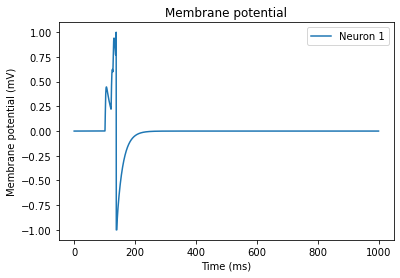

In [13]:
nest.voltage_trace.from_device(voltmeter)
plt.show()

ValueError: max() arg is an empty sequence

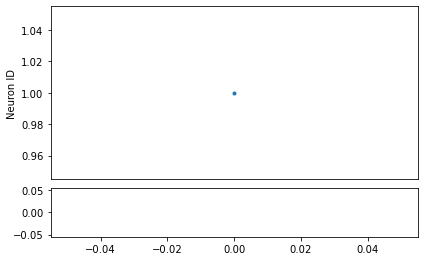

In [14]:
nest.raster_plot.from_device(espikes, hist=True)
plt.show()